# Data Analysis

In [258]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import copy
from IPython.display import Image
from qutip import *
import time

import pickle

In [259]:
figure_width    = 10 
figure_height   = 6
tick_size       = 12
label_size      = 15
linewidth       = 3

color_1         = 'black'
color_2         = 'orange'

verbose         = False

# Convergence at 0.3 GHz

## Sum (100) at 0.3 GHz

In [260]:
n_trails = 100

with open("SUM/100/2023_GRAPE_sum.bin", "rb") as f:
    rec_c_s, rec_f_s= pickle.load(f)
    
Thresh = 0.75

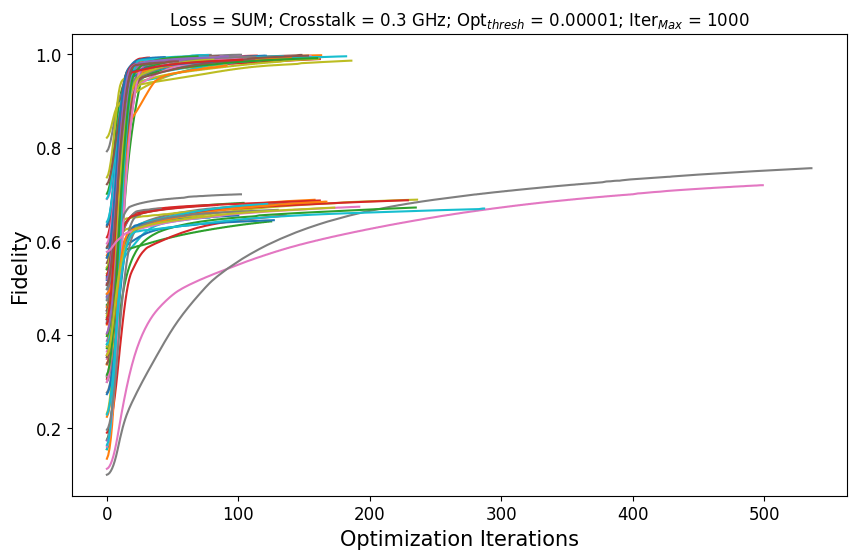

In [261]:
fig = plt.figure(figsize=(figure_width,figure_height))
for i in range(n_trails): # apply GRAPE with random initial multiple times
    plt.plot(rec_f_s[i])
    # if rec_f_s[i][-1] < Thresh:
    #     plt.plot(rec_f_s[i], color=color_1)
    # else:
    #     plt.plot(rec_f_s[i], color=color_2)

plt.xlabel("Optimization Iterations", fontsize = label_size)
plt.ylabel("Fidelity", fontsize = label_size)
plt.title(r"Loss = SUM; Crosstalk = 0.3 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_100.jpg')

#plt.legend([str(i) for i in range(n_trails)])
plt.show()

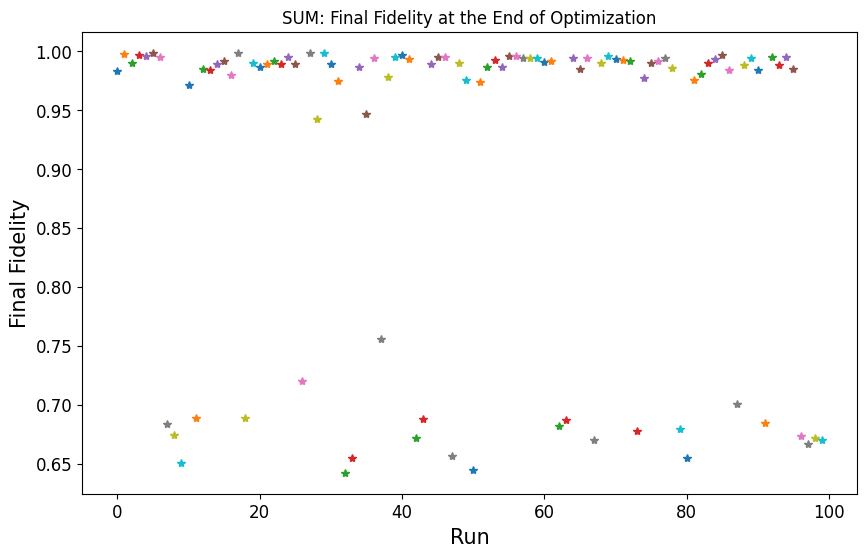

Number of runs converging to global optima: 73/100 (mean: 0.99, std: 0.01); Convergence rate: mean: 95.18, std: 40.30
Number of runs converging to local optima: 22/100 (mean: 0.67, std: 0.01); Convergence rate: mean: 146.32, std: 62.99


In [262]:
lists = sorted(rec_f_s.items())
x, y = zip(*lists) 
conv_u = []
conv_l = []
conv_m = []
fid_u = []
fid_l = []
fid_m = []

fig = plt.figure(figsize=(figure_width,figure_height))

for i in range(n_trails):
    p_y = y[i]
    if p_y[-1]<0.7:
        conv_l.append(len(p_y))
        fid_l.append(p_y[-1])
    elif p_y[-1]<0.95:
        conv_m.append(len(p_y))
        fid_m.append(p_y[-1])
    else:
        conv_u.append(len(p_y))
        fid_u.append(p_y[-1])
    plt.plot(x[i],p_y[-1],'*')
    
plt.xlabel("Run", fontsize = label_size)
plt.ylabel("Final Fidelity", fontsize = label_size)
plt.title(r"SUM: Final Fidelity at the End of Optimization")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_STAT.jpg')

plt.show()

print("Number of runs converging to global optima: %i/100 (mean: %.2f, std: %.2f); Convergence rate: mean: %.2f, std: %.2f" %(len(conv_u), np.mean(fid_u), np.std(fid_u), np.mean(conv_u), np.std(conv_u)))
print("Number of runs converging to local optima: %i/100 (mean: %.2f, std: %.2f); Convergence rate: mean: %.2f, std: %.2f" %(len(conv_l), np.mean(fid_l), np.std(fid_l), np.mean(conv_l), np.std(conv_l)))

## Product (100) at 0.3 GHz

In [263]:
n_trails = 100

with open("PRODUCT/100/2023_GRAPE_product.bin", "rb") as f:
    rec_c_p, rec_f_p= pickle.load(f)

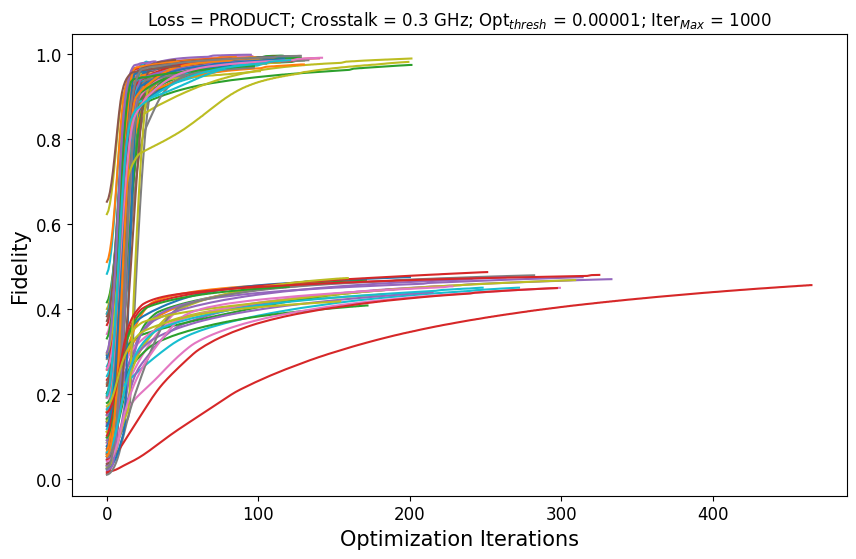

In [264]:
fig = plt.figure(figsize=(figure_width,figure_height))

for i in range(n_trails): # apply GRAPE with random initial multiple times
    plt.plot(rec_f_p[i])

plt.xlabel("Optimization Iterations", fontsize = label_size)
plt.ylabel("Fidelity", fontsize = label_size)
plt.title(r"Loss = PRODUCT; Crosstalk = 0.3 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/PRODUCT_CROSSTALK_100.jpg')

plt.show()

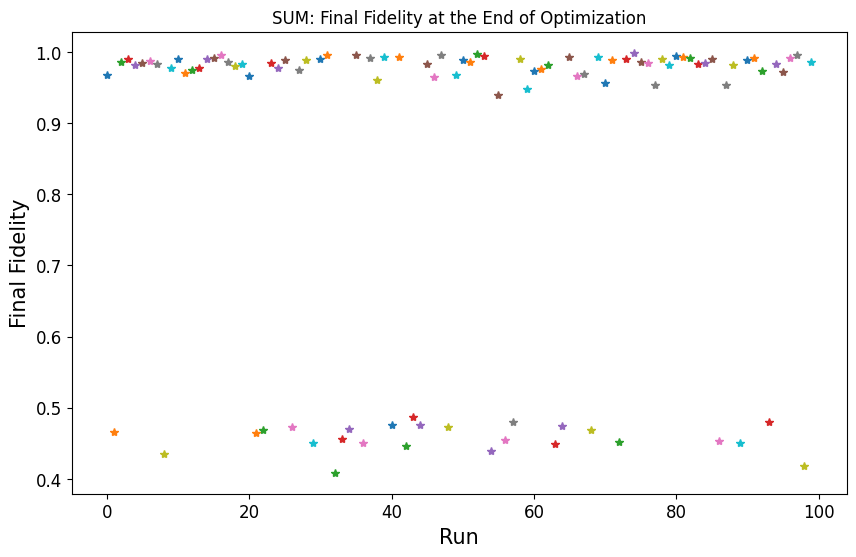

Number of runs converging to global optima: 72/100 (mean: 0.98, std: 0.01); Convergence rate: mean: 96.07, std: 40.12
Number of runs converging to local optima: 26/100 (mean: 0.46, std: 0.02); Convergence rate: mean: 240.08, std: 75.11


In [265]:
lists = sorted(rec_f_p.items())
x, y = zip(*lists) 
conv_u = []
conv_l = []
conv_m = []
fid_u = []
fid_l = []
fid_m = []

fig = plt.figure(figsize=(figure_width,figure_height))

for i in range(n_trails):
    p_y = y[i]
    if p_y[-1]<0.5:
        conv_l.append(len(p_y))
        fid_l.append(p_y[-1])
    elif p_y[-1]<0.95:
        conv_m.append(len(p_y))
        fid_m.append(p_y[-1])
    else:
        conv_u.append(len(p_y))
        fid_u.append(p_y[-1])
    plt.plot(x[i],p_y[-1],'*')
    
plt.xlabel("Run", fontsize = label_size)
plt.ylabel("Final Fidelity", fontsize = label_size)
plt.title(r"SUM: Final Fidelity at the End of Optimization")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/PRODUCT_CROSSTALK_STAT.jpg')

plt.show()

print("Number of runs converging to global optima: %i/100 (mean: %.2f, std: %.2f); Convergence rate: mean: %.2f, std: %.2f" %(len(conv_u), np.mean(fid_u), np.std(fid_u), np.mean(conv_u), np.std(conv_u)))
print("Number of runs converging to local optima: %i/100 (mean: %.2f, std: %.2f); Convergence rate: mean: %.2f, std: %.2f" %(len(conv_l), np.mean(fid_l), np.std(fid_l), np.mean(conv_l), np.std(conv_l)))

# Crosstalk-Dependent Fidelity

In [266]:
def plot_regular(data):
    
    plt.figure(figsize=(figure_width,figure_height))
    
    for key, value in data.items():
        plt.plot(value)

    plt.xlabel("Optimization Steps", fontsize = label_size)
    plt.ylabel("Fidelity", fontsize = label_size)
    plt.title(r"Loss = SUM; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")
    
    plt.xticks(fontsize=tick_size)
    plt.yticks(fontsize=tick_size)
    
    plt.show()

In [267]:
def extract_ratio(data, threshold):
    n_loc = 0
    n_glo = 0
    s_loc = 0
    s_glo = 0
    for key, value in data.items():
        if value[-1] > threshold:
            n_glo += 1
            s_glo += len(value)
        else:
            n_loc += 1
            s_loc += len(value)
    if n_glo != 0:
        s_glo = s_glo/n_glo
    if n_loc != 0:
        s_loc = s_loc/n_loc
    return n_glo, n_loc, s_glo, s_loc

## Sum (50) at Crosstalk Sweep

In [268]:
from string import ascii_lowercase

SUM_ratio = np.zeros(11)
SUM_ratio_s = np.zeros(11)

for i in range(11):
    with open('SUM/SWEEP/{}.json'.format(i)) as json_file:
        data = json.load(json_file)
    if verbose:
        plot_regular(data)
    n_glo, n_loc, s_glo, s_loc = extract_ratio(data, threshold)
    for c in ascii_lowercase[0:6]:
        with open('SUM/SWEEP/%s%s.json' % (i,c)) as json_file:
            data = json.load(json_file)
        if verbose:
            plot_regular(data)
        n_glo_f, n_loc_f, s_glo_f, s_loc_f = extract_ratio(data, threshold)
        n_glo += n_glo_f
        n_loc += n_loc_f
        s_glo += s_glo_f
        s_loc += s_loc_f
    SUM_ratio[i]    = n_loc/(n_glo+n_loc)
    SUM_ratio_s[i]  = s_loc/s_glo
    print(n_glo+n_loc)

70
70
70
70
70
70
70
70
70
70
70


C:\Users\blien\AppData\Local\Temp\ipykernel_33728\1578286543.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)


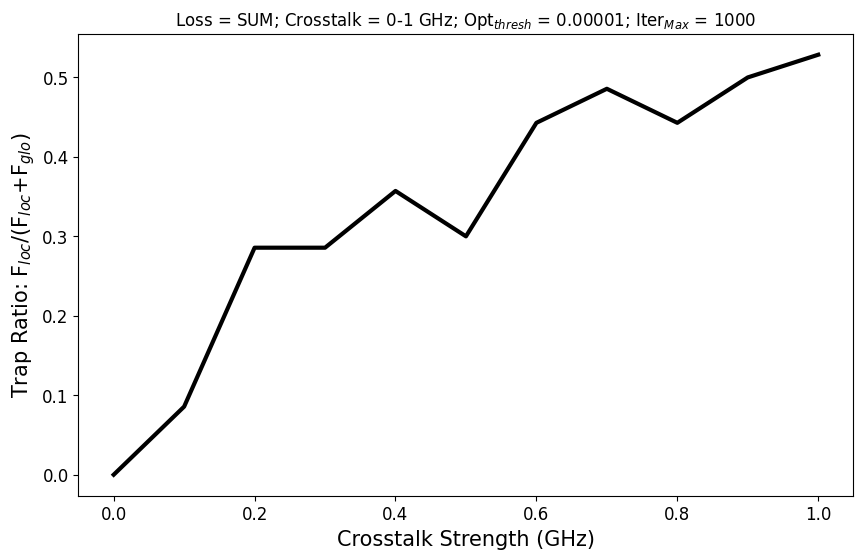

In [269]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

ax.plot(SUM_ratio, color=color_1, linewidth=linewidth)

ax.set_xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
ax.set_ylabel(r"Trap Ratio: F$_{loc}$/(F$_{loc}$+F$_{glo}$)", fontsize = label_size)
ax.set_title(r"Loss = SUM; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_SWEEP.jpg')

plt.show()

C:\Users\blien\AppData\Local\Temp\ipykernel_33728\3338209803.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)


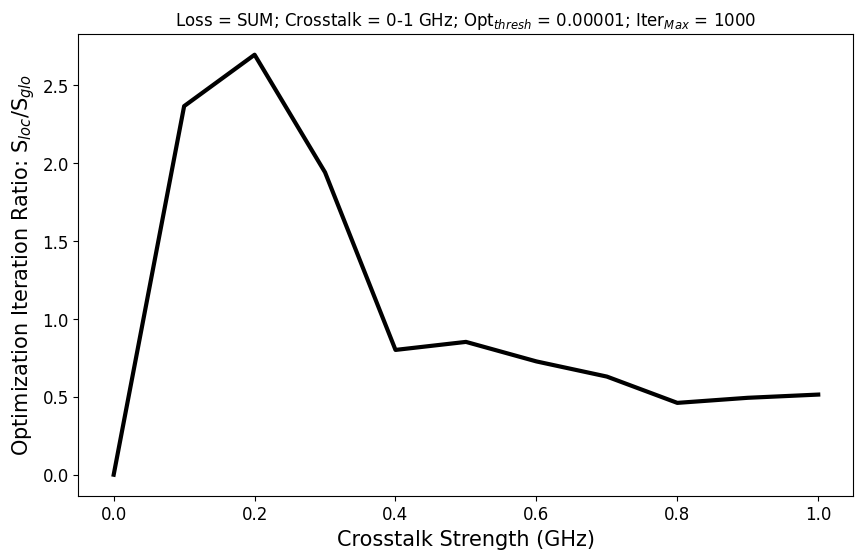

In [270]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

ax.plot(SUM_ratio_s, color=color_1, linewidth=linewidth)

ax.set_xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
ax.set_ylabel(r"Optimization Iteration Ratio: S$_{loc}$/S$_{glo}$", fontsize = label_size)
ax.set_title(r"Loss = SUM; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_SWEEP_STEPS.jpg')

plt.show()

## Product (50) at Crosstalk Sweep

In [271]:
PRO_ratio = np.zeros(11)
PRO_ratio_s = np.zeros(11)

for i in range(11):
    with open('PRODUCT/SWEEP/{}.json'.format(i)) as json_file:
        data = json.load(json_file)
    if verbose:
        plot_regular(data)
    n_glo, n_loc, s_glo, s_loc = extract_ratio(data, threshold)
    with open('PRODUCT/SWEEP/{}add.json'.format(i)) as json_file:
        data = json.load(json_file)
    if verbose:
        plot_regular(data)
    n_glo_1, n_loc_1, s_glo_1, s_loc_1 = extract_ratio(data, threshold)
    n_glo += n_glo_1
    n_loc += n_loc_1
    s_glo += s_glo_1
    s_loc += s_loc_1
    with open('PRODUCT/SWEEP/{}add1.json'.format(i)) as json_file:
        data = json.load(json_file)
    if verbose:
        plot_regular(data)
    n_glo_2, n_loc_2, s_glo_2, s_loc_2 = extract_ratio(data, threshold)
    n_glo += n_glo_2
    n_loc += n_loc_2
    s_glo += s_glo_2
    s_loc += s_loc_2
    PRO_ratio[i]    = n_loc/(n_glo+n_loc)
    PRO_ratio_s[i]  = s_loc/s_glo
    print((n_glo+n_loc))

60
60
60
60
60
60
60
60
60
60
60


C:\Users\blien\AppData\Local\Temp\ipykernel_33728\3452637327.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)


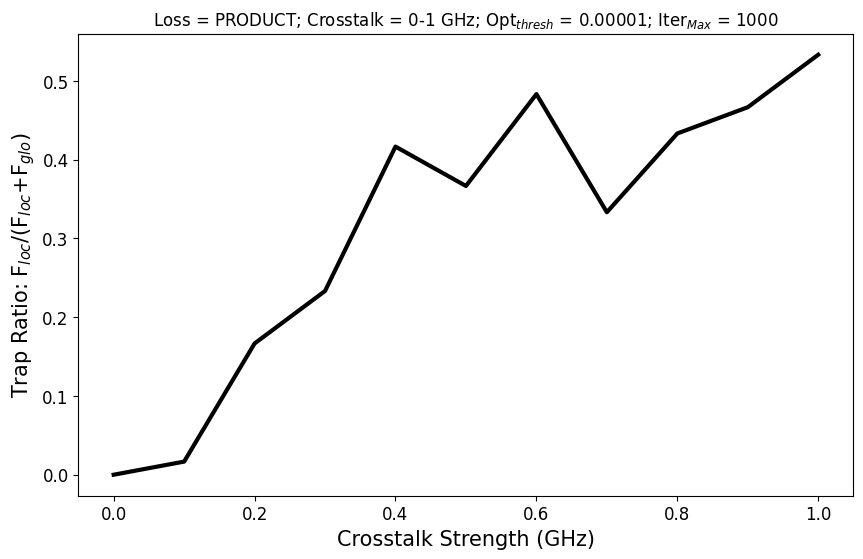

In [272]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

ax.plot(PRO_ratio, color=color_1, linewidth=linewidth)

ax.set_xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
ax.set_ylabel(r"Trap Ratio: F$_{loc}$/(F$_{loc}$+F$_{glo}$)", fontsize = label_size)
ax.set_title(r"Loss = PRODUCT; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

fig.savefig('FIGURES/PRODUCT_CROSSTALK_SWEEP.jpg')

plt.show()

C:\Users\blien\AppData\Local\Temp\ipykernel_33728\4246214351.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)


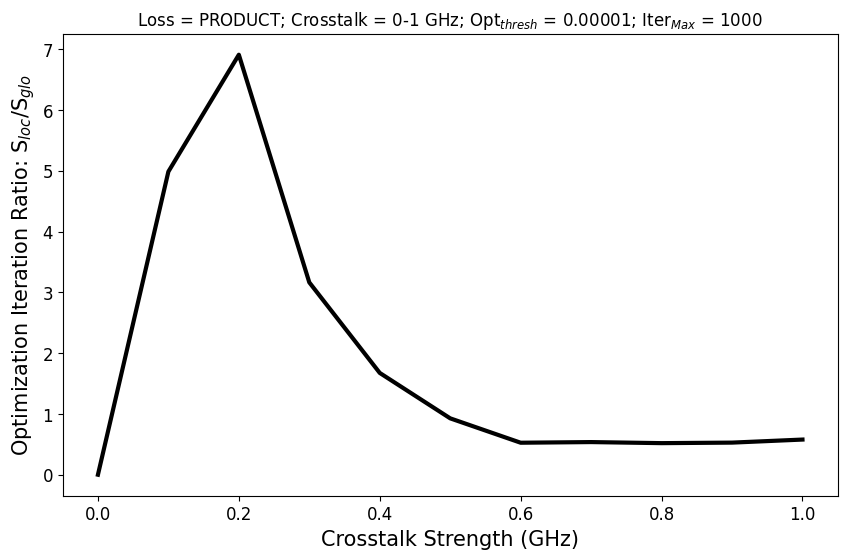

In [273]:
fig, ax = plt.subplots(figsize=(figure_width,figure_height))

ax.plot(PRO_ratio_s, color=color_1, linewidth=linewidth)

ax.set_xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
ax.set_ylabel(r"Optimization Iteration Ratio: S$_{loc}$/S$_{glo}$", fontsize = label_size)
ax.set_title(r"Loss = PRODUCT; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

ax.set_xticklabels(list(np.round(np.concatenate((np.zeros(1),np.linspace(0, 1, 6))), 2)), fontsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)

fig.savefig('FIGURES/PRODUCT_CROSSTALK_SWEEP_STEPS.jpg')

plt.show()

# Crosstalk-Dependence of Optima

## Sum (10) Optimized at min crosstalk strength -> max 

In [274]:
with open('SUM/OPTIMA/0crosstalk.json') as json_file:
    data0 = json.load(json_file)
print(len(data0.keys()))

10


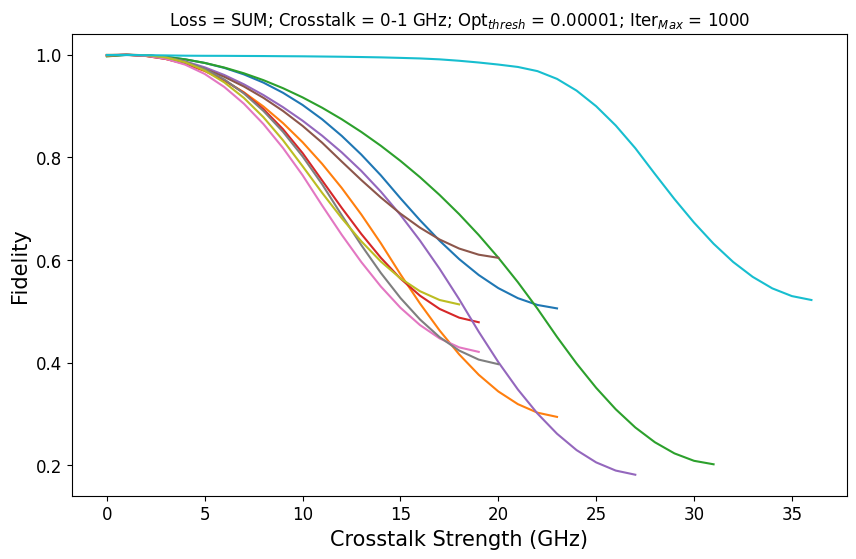

In [275]:
fig = plt.figure(figsize=(figure_width,figure_height))

for key, value in data0.items():
    plt.plot(np.flip(np.array(value)))

plt.xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
plt.ylabel("Fidelity", fontsize = label_size)
plt.title(r"Loss = SUM; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_0to1.jpg')

plt.show()

## Sum (50) Optimized at max crosstalk strength -> 0 

In [276]:
with open('SUM/OPTIMA/1crosstalk.json') as json_file:
    data1 = json.load(json_file)
print(len(data1.keys()))

50


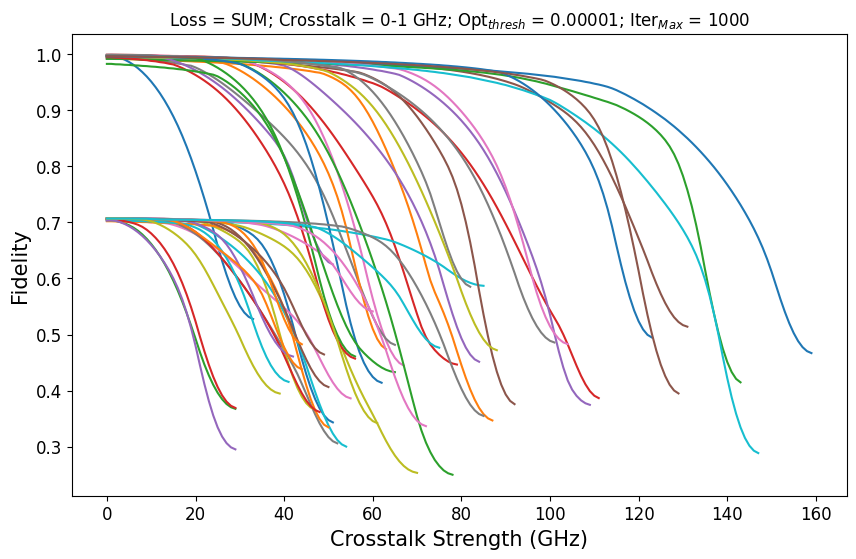

In [277]:
fig = plt.figure(figsize=(figure_width,figure_height))

for key, value in data1.items():
    plt.plot(np.flip(np.array(value)))

plt.xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
plt.ylabel("Fidelity", fontsize = label_size)
plt.title(r"Loss = SUM; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/SUM_CROSSTALK_1to0.jpg')

plt.show()

## Product (50) Optimized at max crosstalk strength -> 0 

In [278]:
with open('PRODUCT/OPTIMA/prd_1crosstalk.json') as json_file:
    datap = json.load(json_file)

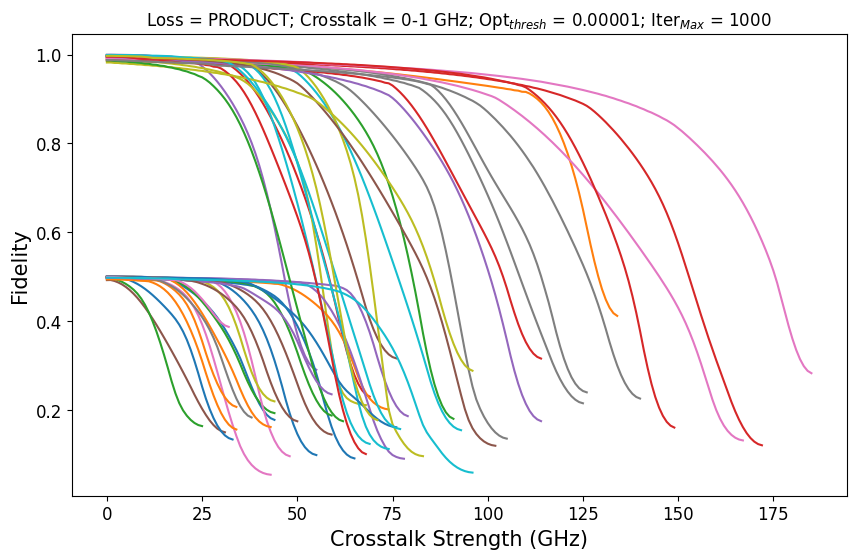

In [279]:
fig = plt.figure(figsize=(figure_width,figure_height))

for key, value in datap.items():
    plt.plot(np.flip(np.array(value)))

plt.xlabel("Crosstalk Strength (GHz)", fontsize = label_size)
plt.ylabel("Fidelity", fontsize = label_size)
plt.title(r"Loss = PRODUCT; Crosstalk = 0-1 GHz; Opt$_{thresh}$ = 0.00001; Iter$_{Max}$ = 1000")

plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

fig.savefig('FIGURES/PRODUCT_CROSSTALK_1to0.jpg')

plt.show()